---

# **Notebook 15 : Visualisations des Données de Produits**

---

### **1. Importation des Bibliothèques**

Importons les bibliothèques nécessaires pour la manipulation des données et la création des visualisations, y compris un graphique de type Wordcloud.

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

---

### **2. Chargement des Données**

Dans cette section, nous chargeons et traitons les fichiers CSV nettoyés, puis consolidons les données pour les visualisations.

In [2]:
# Répertoire contenant les fichiers nettoyés
input_directory = 'note-books/phase_1_data/14_categorized_data'

# Chargement de toutes les données dans un seul DataFrame
full_data = pd.DataFrame()

for file_name in os.listdir(input_directory):
    file_path = os.path.join(input_directory, file_name)
    
    # Charger le fichier avec encodage
    try:
        df = pd.read_csv(file_path, encoding='utf-8')
    except UnicodeDecodeError:
        print(f"Problème d'encodage pour {file_name}, réessayé avec 'ISO-8859-1'.")
        df = pd.read_csv(file_path, encoding='ISO-8859-1', errors='replace')
    
    full_data = pd.concat([full_data, df], ignore_index=True)

---

### **3. Visualisation des Produits par Année (Bargraph)**

Créons un graphique en barres montrant le nombre de produits par année en utilisant la colonne `created_datetime` pour extraire les années.

/var/folders/l_/z4yzpdw13r1_992xyftwcsmr0000gn/T/ipykernel_3145/4061939728.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=produits_par_année.index, y=produits_par_année.values, palette='viridis')


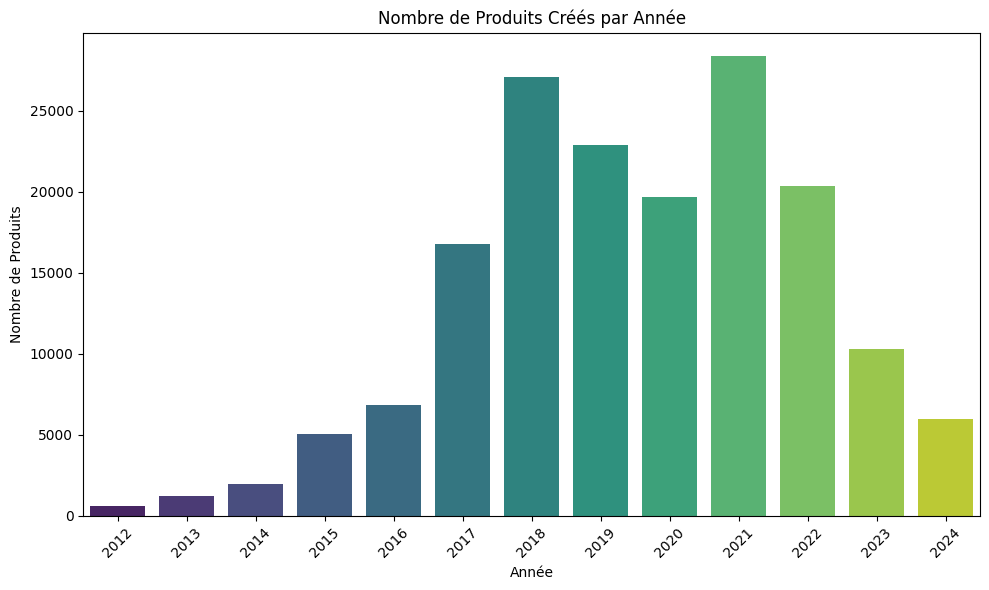

Graphique des produits par année sauvegardé dans note-books/phase_1_data/graphique/produits_par_année.png


In [3]:
# Extraire l'année de la date de création
full_data['année'] = pd.to_datetime(full_data['created_datetime'], errors='coerce').dt.year

# Compter le nombre de produits par année
produits_par_année = full_data['année'].value_counts().sort_index()

# Création du bargraph
plt.figure(figsize=(10, 6))
sns.barplot(x=produits_par_année.index, y=produits_par_année.values, palette='viridis')
plt.title("Nombre de Produits Créés par Année")
plt.xlabel("Année")
plt.ylabel("Nombre de Produits")
plt.xticks(rotation=45)
plt.tight_layout()

# Sauvegarder le graphique
output_graph_path_year = 'note-books/phase_1_data/graphique/produits_par_année.png'
plt.savefig(output_graph_path_year)
plt.show()

print(f"Graphique des produits par année sauvegardé dans {output_graph_path_year}")

---

### **4. Tableau de Répartition des Produits par Pays**

Créons un tableau récapitulatif du nombre de produits par pays et sauvegardons-le en format CSV, ainsi qu'une visualisation sous forme de graphique en barres.

Tableau de répartition des produits par pays :
               Pays  Nombre de Produits
0            France               53164
1             en:it               10924
2             en:fr                7841
3           Germany                6608
4             Italy                6085
...             ...                 ...
1282        Bhoutan                   1
1283          Népal                   1
1284     Portugalia                   1
1285          suiza                   1
1286  Saudi-Arabien                   1

[1287 rows x 2 columns]
Tableau de répartition des produits par pays sauvegardé dans note-books/phase_1_data/graphique/tableau_repartition_pays.csv


/var/folders/l_/z4yzpdw13r1_992xyftwcsmr0000gn/T/ipykernel_3145/3435910384.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Nombre de Produits', y='Pays', data=produits_par_pays_counts.head(20), palette='viridis')


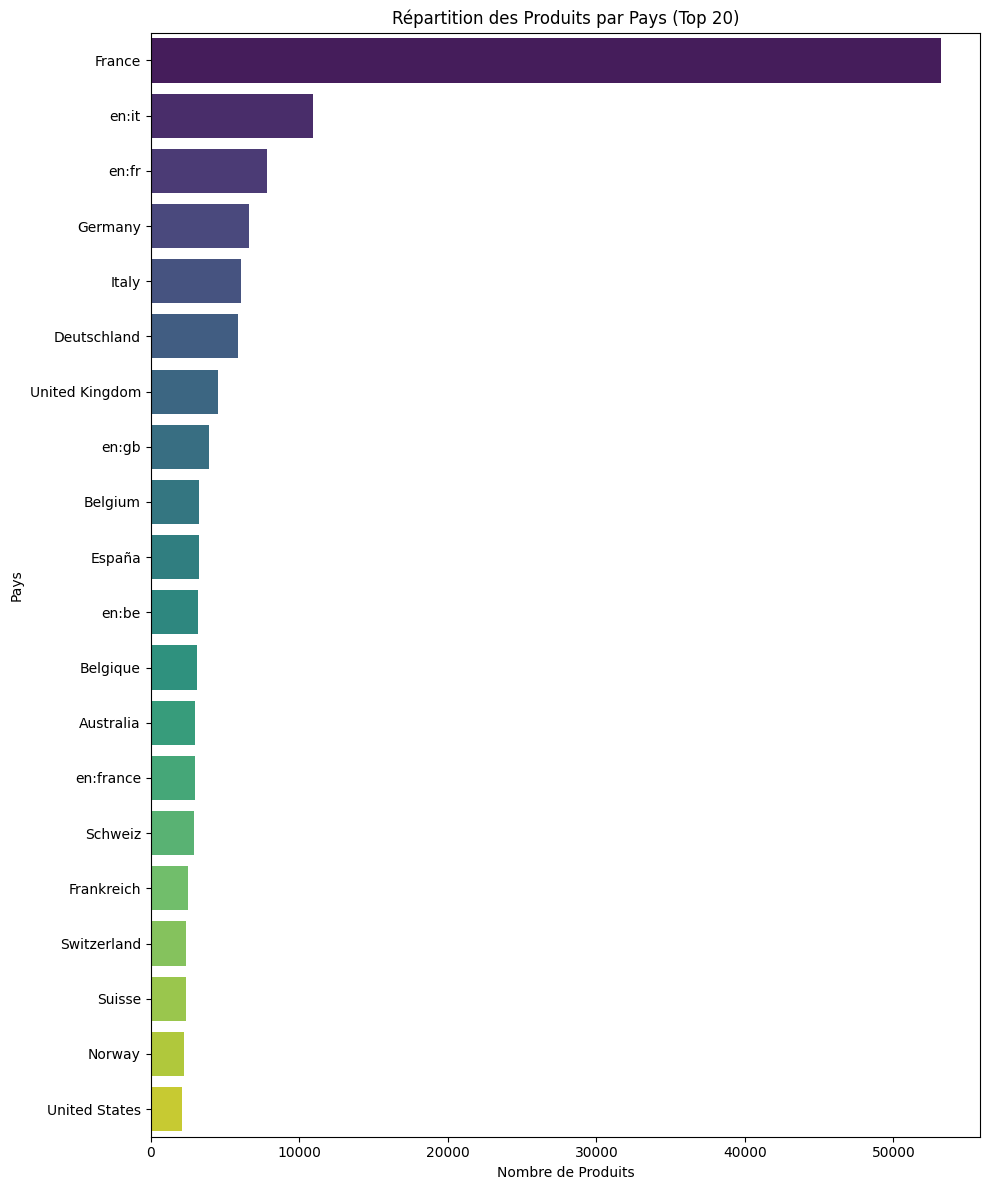

Graphique de répartition des produits par pays sauvegardé dans note-books/phase_1_data/graphique/produits_par_pays.png


In [4]:
# Nettoyage et comptage des occurrences des pays
produits_par_pays = full_data['countries'].str.split(',').explode().str.strip()
produits_par_pays_counts = produits_par_pays.value_counts().reset_index()
produits_par_pays_counts.columns = ['Pays', 'Nombre de Produits']

# Afficher le tableau pour confirmation
print("Tableau de répartition des produits par pays :")
print(produits_par_pays_counts)

# Sauvegarder le tableau dans un fichier CSV
output_csv_path_pays = 'note-books/phase_1_data/graphique/tableau_repartition_pays.csv'
produits_par_pays_counts.to_csv(output_csv_path_pays, index=False)
print(f"Tableau de répartition des produits par pays sauvegardé dans {output_csv_path_pays}")

# Création du graphique
plt.figure(figsize=(10, 12))
sns.barplot(x='Nombre de Produits', y='Pays', data=produits_par_pays_counts.head(20), palette='viridis')
plt.title("Répartition des Produits par Pays (Top 20)")
plt.xlabel("Nombre de Produits")
plt.ylabel("Pays")
plt.tight_layout()

# Sauvegarder le graphique
output_graph_path_country = 'note-books/phase_1_data/graphique/produits_par_pays.png'
plt.savefig(output_graph_path_country)
plt.show()

print(f"Graphique de répartition des produits par pays sauvegardé dans {output_graph_path_country}")

---

### **5. Création d’un Wordcloud pour les Catégories**

Cette étape génère un Wordcloud basé sur les occurrences des catégories de produits dans la colonne `categories`.

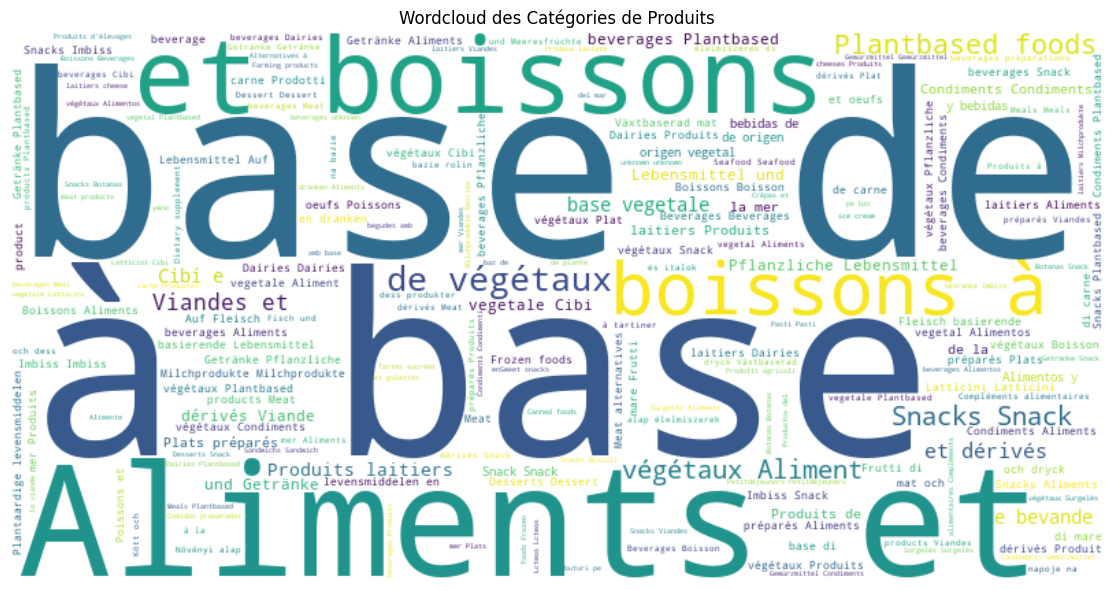

Wordcloud des catégories sauvegardé dans note-books/phase_1_data/graphique/wordcloud_categories.png


In [5]:
# Fusionner toutes les catégories pour le Wordcloud
text = ' '.join(full_data['categories'].dropna().astype(str))

# Création du Wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

# Affichage du Wordcloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Wordcloud des Catégories de Produits")
plt.tight_layout()

# Sauvegarder le Wordcloud
output_wordcloud_path = 'note-books/phase_1_data/graphique/wordcloud_categories.png'
plt.savefig(output_wordcloud_path)
plt.show()

print(f"Wordcloud des catégories sauvegardé dans {output_wordcloud_path}")

---

### **Explications**

- **Produits par année** : Nous visualisons le nombre de produits créés chaque année pour observer l'évolution dans le temps.
- **Répartition des produits par pays** : Ce tableau et graphique montrent la répartition des produits par pays pour identifier les pays avec le plus de produits.
- **Wordcloud des catégories** : Le Wordcloud offre une vue d’ensemble des catégories de produits, mettant en évidence celles qui sont les plus fréquentes.

--- 